In [1]:
#import packages needed
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in csv
daily_df = pd.read_csv("Resources/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals (3).csv")
monthly_df = pd.read_csv("Resources/CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals_2019.csv")

In [3]:
#check that csv reads in correctly
daily_df.head()

,station_id,stationname,date,daytype,rides
0,41240,Addison-O'Hare,1/1/2014,U,928
1,41310,Paulina,1/1/2014,U,1140
2,40290,Ashland/63rd,1/1/2014,U,641
3,41460,Irving Park-Brown,1/1/2014,U,999
4,40580,54th/Cermak,1/1/2014,U,641


In [4]:
#check that csv reads in correctly
monthly_df.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,1/1/2014,5665.7,4130.3,3042.2,156378
1,41190,Jarvis,1/1/2014,1509.8,1363.0,1025.6,43795
2,40100,Morse,1/1/2014,3652.2,3075.5,2350.6,104404
3,41300,Loyola,1/1/2014,5831.0,4617.3,3299.8,163251
4,40760,Granville,1/1/2014,3834.7,3228.5,2403.2,109294


In [5]:
#rename the columns for the daily df
daily_df = daily_df.rename(columns={'station_id': 'Station ID',
                        'stationame': 'Station Name',
                        'date': 'Date',
                        'daytype': 'Day Type',
                        'rides': 'Rides'})

In [6]:
#check that columns renamed correctly
daily_df.head()

,Station ID,stationname,Date,Day Type,Rides
0,41240,Addison-O'Hare,1/1/2014,U,928
1,41310,Paulina,1/1/2014,U,1140
2,40290,Ashland/63rd,1/1/2014,U,641
3,41460,Irving Park-Brown,1/1/2014,U,999
4,40580,54th/Cermak,1/1/2014,U,641


In [7]:
#rename the columns for the monthly df
monthly_df = monthly_df.rename(columns={'station_id': 'Station ID',
                           'stationame': 'Station Name',
                           'month_beginning': 'Month Date',
                           'avg_weekday_rides': 'Average Weekday Rides',
                           'avg_saturday_rides': 'Average Saturday Rides',
                           'avg_sunday-holiday_rides': 'Average Sunday-Holiday Rides',
                           'monthtotal': 'Monthly Total'})

In [8]:
#check that columns renamed correctly
monthly_df.head()

,Station ID,Station Name,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total
0,40900,Howard,1/1/2014,5665.7,4130.3,3042.2,156378
1,41190,Jarvis,1/1/2014,1509.8,1363.0,1025.6,43795
2,40100,Morse,1/1/2014,3652.2,3075.5,2350.6,104404
3,41300,Loyola,1/1/2014,5831.0,4617.3,3299.8,163251
4,40760,Granville,1/1/2014,3834.7,3228.5,2403.2,109294


In [10]:
#cleaning 'Month Day' to split to Month column
monthly_df['Month Date'] = pd.to_datetime(monthly_df['Month Date'])
monthly_df['Month Date']

0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
12349   2021-02-01
12350   2021-02-01
12351   2021-02-01
12352   2021-02-01
12353   2021-02-01
Name: Month Date, Length: 12354, dtype: datetime64[ns]

In [11]:
#cleaning 'Month Day' to split to Year column
monthly_df['Year'] = monthly_df['Month Date'].dt.year
monthly_df['Month'] = monthly_df['Month Date'].dt.month

In [12]:
#check dataframe to make sure columns split properly into Year and Month 
monthly_df.head()

,Station ID,Station Name,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1
1,41190,Jarvis,2014-01-01,1509.8,1363.0,1025.6,43795,2014,1
2,40100,Morse,2014-01-01,3652.2,3075.5,2350.6,104404,2014,1
3,41300,Loyola,2014-01-01,5831.0,4617.3,3299.8,163251,2014,1
4,40760,Granville,2014-01-01,3834.7,3228.5,2403.2,109294,2014,1


In [13]:
#identifying line ("L) stops and check output 
lstops = pd.read_csv("Resources/CTA_-_System_Information_-_List_of__L__Stops.csv")
lstops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [14]:
#cleaning up column name (STATION_NAME --> Station Name) and check output 
lstops = lstops.rename(columns={'MAP_ID': 'Station ID',
                                'STATION_NAME': 'Station Name',
                           'STATION_DESCRIPTIVE_NAME': 'Line Color'})
lstops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,Station Name,Line Color,Station ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [15]:
#merging data by Station ID and check output 
merge_df = pd.merge(monthly_df, lstops, on = "Station ID")
merge_df.head()

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,STOP_ID,...,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30176,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30173,...,True,False,False,False,False,False,False,False,False,"(42.019063, -87.672892)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30174,...,True,False,False,False,False,False,False,False,False,"(42.019063, -87.672892)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30175,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,30176,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"


In [16]:
#checking column names of newly merged data  
merge_df.columns

Index(['Station ID', 'Station Name_x', 'Month Date', 'Average Weekday Rides',
       'Average Saturday Rides', 'Average Sunday-Holiday Rides',
       'Monthly Total', 'Year', 'Month', 'STOP_ID', 'DIRECTION_ID',
       'STOP_NAME', 'Station Name_y', 'Line Color', 'ADA', 'RED', 'BLUE', 'G',
       'BRN', 'P', 'Pexp', 'Y', 'Pnk', 'O', 'Location'],
      dtype='object')

In [17]:
#dropping unecessary columns and check output 
new_monthly_df = merge_df.drop(columns = ['STOP_ID', 'DIRECTION_ID', 'STOP_NAME', 'Station Name_y', 'ADA', 'RED', 'BLUE', 'G', 'BRN', 'P', 'Pexp', 'Y', 'Pnk', 'O'])
new_monthly_df.head()

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"


In [18]:
#splitting 'Line Color' to separately give station name and L color and check output  
new_monthly_df [["Station Name 2", "L Color"]] = new_monthly_df["Line Color"].str.split("(",expand=True)
new_monthly_df.head()

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location,Station Name 2,L Color
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"


In [19]:
#dropping duplicates and check output 
new_monthly_df = new_monthly_df.drop_duplicates()
new_monthly_df.head()

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location,Station Name 2,L Color
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
8,40900,Howard,2014-03-01,6336.1,4662.6,3404.4,173393,2014,3,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
12,40900,Howard,2014-04-01,6281.5,4641.5,3398.3,170351,2014,4,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
16,40900,Howard,2014-05-01,6336.4,4546.4,3408.0,172836,2014,5,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"


In [20]:
# cleaning L color column text and check output 
new_monthly_df["L Color"] = new_monthly_df["L Color"].str.replace(")", "",regex = True)
new_monthly_df.head()

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location,Station Name 2,L Color
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines"
8,40900,Howard,2014-03-01,6336.1,4662.6,3404.4,173393,2014,3,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines"
12,40900,Howard,2014-04-01,6281.5,4641.5,3398.3,170351,2014,4,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines"
16,40900,Howard,2014-05-01,6336.4,4546.4,3408.0,172836,2014,5,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines"


In [21]:
#dropping unecessary columns and check output 
new_monthly_df = new_monthly_df.drop(columns = ['Station ID', 'Month Date', 'Line Color', 'Station Name 2','Location'])
new_monthly_df.head()

,Station Name_x,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,L Color
0,Howard,5665.7,4130.3,3042.2,156378,2014,1,"Red, Purple & Yellow Lines"
4,Howard,6334.2,4197.3,3195.5,156254,2014,2,"Red, Purple & Yellow Lines"
8,Howard,6336.1,4662.6,3404.4,173393,2014,3,"Red, Purple & Yellow Lines"
12,Howard,6281.5,4641.5,3398.3,170351,2014,4,"Red, Purple & Yellow Lines"
16,Howard,6336.4,4546.4,3408.0,172836,2014,5,"Red, Purple & Yellow Lines"


In [22]:
#reorder columns for clarity
cleaned_monthly_df = new_monthly_df[['Year', 'Month', 'L Color', 'Station Name_x', 'Monthly Total', 'Average Weekday Rides', 'Average Saturday Rides', 'Average Sunday-Holiday Rides']]
cleaned_monthly_df.head()

,Year,Month,L Color,Station Name_x,Monthly Total,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides
0,2014,1,"Red, Purple & Yellow Lines",Howard,156378,5665.7,4130.3,3042.2
4,2014,2,"Red, Purple & Yellow Lines",Howard,156254,6334.2,4197.3,3195.5
8,2014,3,"Red, Purple & Yellow Lines",Howard,173393,6336.1,4662.6,3404.4
12,2014,4,"Red, Purple & Yellow Lines",Howard,170351,6281.5,4641.5,3398.3
16,2014,5,"Red, Purple & Yellow Lines",Howard,172836,6336.4,4546.4,3408.0


In [23]:
#clean Station Name column header text 
cleaned_monthly_df = cleaned_monthly_df.rename(columns={'Station Name_x': 'Station Name'})
cleaned_monthly_df.head()

,Year,Month,L Color,Station Name,Monthly Total,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides
0,2014,1,"Red, Purple & Yellow Lines",Howard,156378,5665.7,4130.3,3042.2
4,2014,2,"Red, Purple & Yellow Lines",Howard,156254,6334.2,4197.3,3195.5
8,2014,3,"Red, Purple & Yellow Lines",Howard,173393,6336.1,4662.6,3404.4
12,2014,4,"Red, Purple & Yellow Lines",Howard,170351,6281.5,4641.5,3398.3
16,2014,5,"Red, Purple & Yellow Lines",Howard,172836,6336.4,4546.4,3408.0


In [24]:
#create data frames for monthly L usage by year and check output 
df_2014 = cleaned_monthly_df[cleaned_monthly_df.Year==2014].copy()
df_2015 = cleaned_monthly_df[cleaned_monthly_df.Year==2015].copy()
df_2016 = cleaned_monthly_df[cleaned_monthly_df.Year==2016].copy()
df_2017 = cleaned_monthly_df[cleaned_monthly_df.Year==2017].copy()
df_2018 = cleaned_monthly_df[cleaned_monthly_df.Year==2018].copy()
df_2019 = cleaned_monthly_df[cleaned_monthly_df.Year==2019].copy()
df_2020 = cleaned_monthly_df[cleaned_monthly_df.Year==2020].copy()
df_2014.head()

,Year,Month,L Color,Station Name,Monthly Total,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides
0,2014,1,"Red, Purple & Yellow Lines",Howard,156378,5665.7,4130.3,3042.2
4,2014,2,"Red, Purple & Yellow Lines",Howard,156254,6334.2,4197.3,3195.5
8,2014,3,"Red, Purple & Yellow Lines",Howard,173393,6336.1,4662.6,3404.4
12,2014,4,"Red, Purple & Yellow Lines",Howard,170351,6281.5,4641.5,3398.3
16,2014,5,"Red, Purple & Yellow Lines",Howard,172836,6336.4,4546.4,3408.0


In [25]:
#group monthly totals by year by line color and check output 
grouped2014 = df_2014.groupby('L Color')
grouped2015 = df_2015.groupby('L Color')
grouped2016 = df_2016.groupby('L Color')
grouped2017 = df_2017.groupby('L Color')
grouped2018 = df_2018.groupby('L Color')
grouped2019 = df_2019.groupby('L Color')
grouped2020 = df_2020.groupby('L Color')
grouped2014.head()

,Year,Month,L Color,Station Name,Monthly Total,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides
0,2014,1,"Red, Purple & Yellow Lines",Howard,156378,5665.7,4130.3,3042.2
4,2014,2,"Red, Purple & Yellow Lines",Howard,156254,6334.2,4197.3,3195.5
8,2014,3,"Red, Purple & Yellow Lines",Howard,173393,6336.1,4662.6,3404.4
12,2014,4,"Red, Purple & Yellow Lines",Howard,170351,6281.5,4641.5,3398.3
16,2014,5,"Red, Purple & Yellow Lines",Howard,172836,6336.4,4546.4,3408.0
...,...,...,...,...,...,...,...,...
25116,2014,1,"Blue, Brown, Green, Orange, Purple & Pink Lines",Clark/Lake,434627,17635.4,5936.8,4580.4
25120,2014,2,"Blue, Brown, Green, Orange, Purple & Pink Lines",Clark/Lake,405985,18444.4,5296.8,3977.5
25124,2014,3,"Blue, Brown, Green, Orange, Purple & Pink Lines",Clark/Lake,462520,19341.5,6899.2,4370.4
25128,2014,4,"Blue, Brown, Green, Orange, Purple & Pink Lines",Clark/Lake,464463,19272.6,5796.0,4320.5


In [26]:
#sum monthly totals by L color by year and check output
sum2014 = grouped2014.sum(['Monthly Total'])
sum2015 = grouped2015.sum(['Monthly Total'])
sum2016 = grouped2016.sum(['Monthly Total'])
sum2017 = grouped2017.sum(['Monthly Total'])
sum2018 = grouped2018.sum(['Monthly Total'])
sum2019 = grouped2019.sum(['Monthly Total'])
sum2020 = grouped2020.sum(['Monthly Total'])
sum2014.head()

,Year,Month,Monthly Total,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides
L Color,,,,,,
Blue Line,700872,2262,42467521,1649086.5,913620.9,717690.6
Blue Line - Forest Park Branch,48336,156,924209,34992.9,22367.1,17266.2
Blue Line - O'Hare Branch,48336,156,2865335,107270.3,76219.6,53130.0
"Blue, Brown, Green, Orange, Purple & Pink Lines",24168,78,5573235,231953.2,78630.2,62136.6
Brown & Purple Lines,145008,468,9486710,379662.7,188701.6,124834.4


In [27]:
#visualize mothly totals by L color by year and check output 
viz2014 = sum2014['Monthly Total']
viz2015 = sum2015['Monthly Total']
viz2016 = sum2016['Monthly Total']
viz2017 = sum2017['Monthly Total']
viz2018 = sum2018['Monthly Total']
viz2019 = sum2019['Monthly Total']
viz2020 = sum2020['Monthly Total']
viz2014

L Color
Blue Line                                          42467521
Blue Line - Forest Park Branch                       924209
Blue Line - O'Hare Branch                           2865335
Blue, Brown, Green, Orange, Purple & Pink Lines     5573235
Brown & Purple Lines                                9486710
Brown Line                                          9815825
Brown, Green, Orange, Pink & Purple Lines           5223647
Brown, Orange, Purple & Pink Lines                  6413202
Green & Pink Lines                                  2668533
Green Line                                         10432459
Orange Line                                         8910756
Pink Line                                           5452165
Purple Line                                         3311197
Red & Purple Lines                                  1974643
Red Line                                           64391171
Red, Brown & Purple Lines                           8552777
Red, Orange & Green Lines       

In [28]:
# display monthly totals by L color by year 
df_viz = pd.concat([viz2014, viz2015, viz2016, viz2017, viz2018, viz2019, viz2020],axis=1)
df_viz.columns = ['2014','2015', '2016', '2017', '2018', '2019', '2020']
df_viz.head()

,2014,2015,2016,2017,2018,2019,2020
Blue Line,42467521.0,44777160.0,44420907.0,43453621,42917824,41777714,14044781
Blue Line - Forest Park Branch,924209.0,942126.0,914984.0,889211,873289,838646,357808
Blue Line - O'Hare Branch,2865335.0,2640472.0,2533597.0,2494196,2526333,2494304,822720
"Blue, Brown, Green, Orange, Purple & Pink Lines",5573235.0,5997069.0,5972666.0,6022533,6048315,5830767,1648674
Brown & Purple Lines,9486710.0,9112653.0,9496271.0,9368371,9443693,9185230,2802577


In [29]:
#reset index to allow for L color to be used as x axis and check output
df_viz.reset_index(inplace=True)
df_viz.head()

,index,2014,2015,2016,2017,2018,2019,2020
0,Blue Line,42467521.0,44777160.0,44420907.0,43453621,42917824,41777714,14044781
1,Blue Line - Forest Park Branch,924209.0,942126.0,914984.0,889211,873289,838646,357808
2,Blue Line - O'Hare Branch,2865335.0,2640472.0,2533597.0,2494196,2526333,2494304,822720
3,"Blue, Brown, Green, Orange, Purple & Pink Lines",5573235.0,5997069.0,5972666.0,6022533,6048315,5830767,1648674
4,Brown & Purple Lines,9486710.0,9112653.0,9496271.0,9368371,9443693,9185230,2802577


In [30]:
#name new L color column and check output 
df_viz.rename(columns={"index": "L Color"}, inplace=True)
df_viz.head()

,L Color,2014,2015,2016,2017,2018,2019,2020
0,Blue Line,42467521.0,44777160.0,44420907.0,43453621,42917824,41777714,14044781
1,Blue Line - Forest Park Branch,924209.0,942126.0,914984.0,889211,873289,838646,357808
2,Blue Line - O'Hare Branch,2865335.0,2640472.0,2533597.0,2494196,2526333,2494304,822720
3,"Blue, Brown, Green, Orange, Purple & Pink Lines",5573235.0,5997069.0,5972666.0,6022533,6048315,5830767,1648674
4,Brown & Purple Lines,9486710.0,9112653.0,9496271.0,9368371,9443693,9185230,2802577


In [31]:
#shorten line names by removing "Lines"
df_viz["L Color"] = df_viz["L Color"].str.replace("Lines", "",regex = True)
df_viz.head()

,L Color,2014,2015,2016,2017,2018,2019,2020
0,Blue Line,42467521.0,44777160.0,44420907.0,43453621,42917824,41777714,14044781
1,Blue Line - Forest Park Branch,924209.0,942126.0,914984.0,889211,873289,838646,357808
2,Blue Line - O'Hare Branch,2865335.0,2640472.0,2533597.0,2494196,2526333,2494304,822720
3,"Blue, Brown, Green, Orange, Purple & Pink",5573235.0,5997069.0,5972666.0,6022533,6048315,5830767,1648674
4,Brown & Purple,9486710.0,9112653.0,9496271.0,9368371,9443693,9185230,2802577


In [32]:
#shorten line names by removing "Line"
df_viz["L Color"] = df_viz["L Color"].str.replace("Line", "",regex = True)
df_viz.head()

,L Color,2014,2015,2016,2017,2018,2019,2020
0,Blue,42467521.0,44777160.0,44420907.0,43453621,42917824,41777714,14044781
1,Blue - Forest Park Branch,924209.0,942126.0,914984.0,889211,873289,838646,357808
2,Blue - O'Hare Branch,2865335.0,2640472.0,2533597.0,2494196,2526333,2494304,822720
3,"Blue, Brown, Green, Orange, Purple & Pink",5573235.0,5997069.0,5972666.0,6022533,6048315,5830767,1648674
4,Brown & Purple,9486710.0,9112653.0,9496271.0,9368371,9443693,9185230,2802577


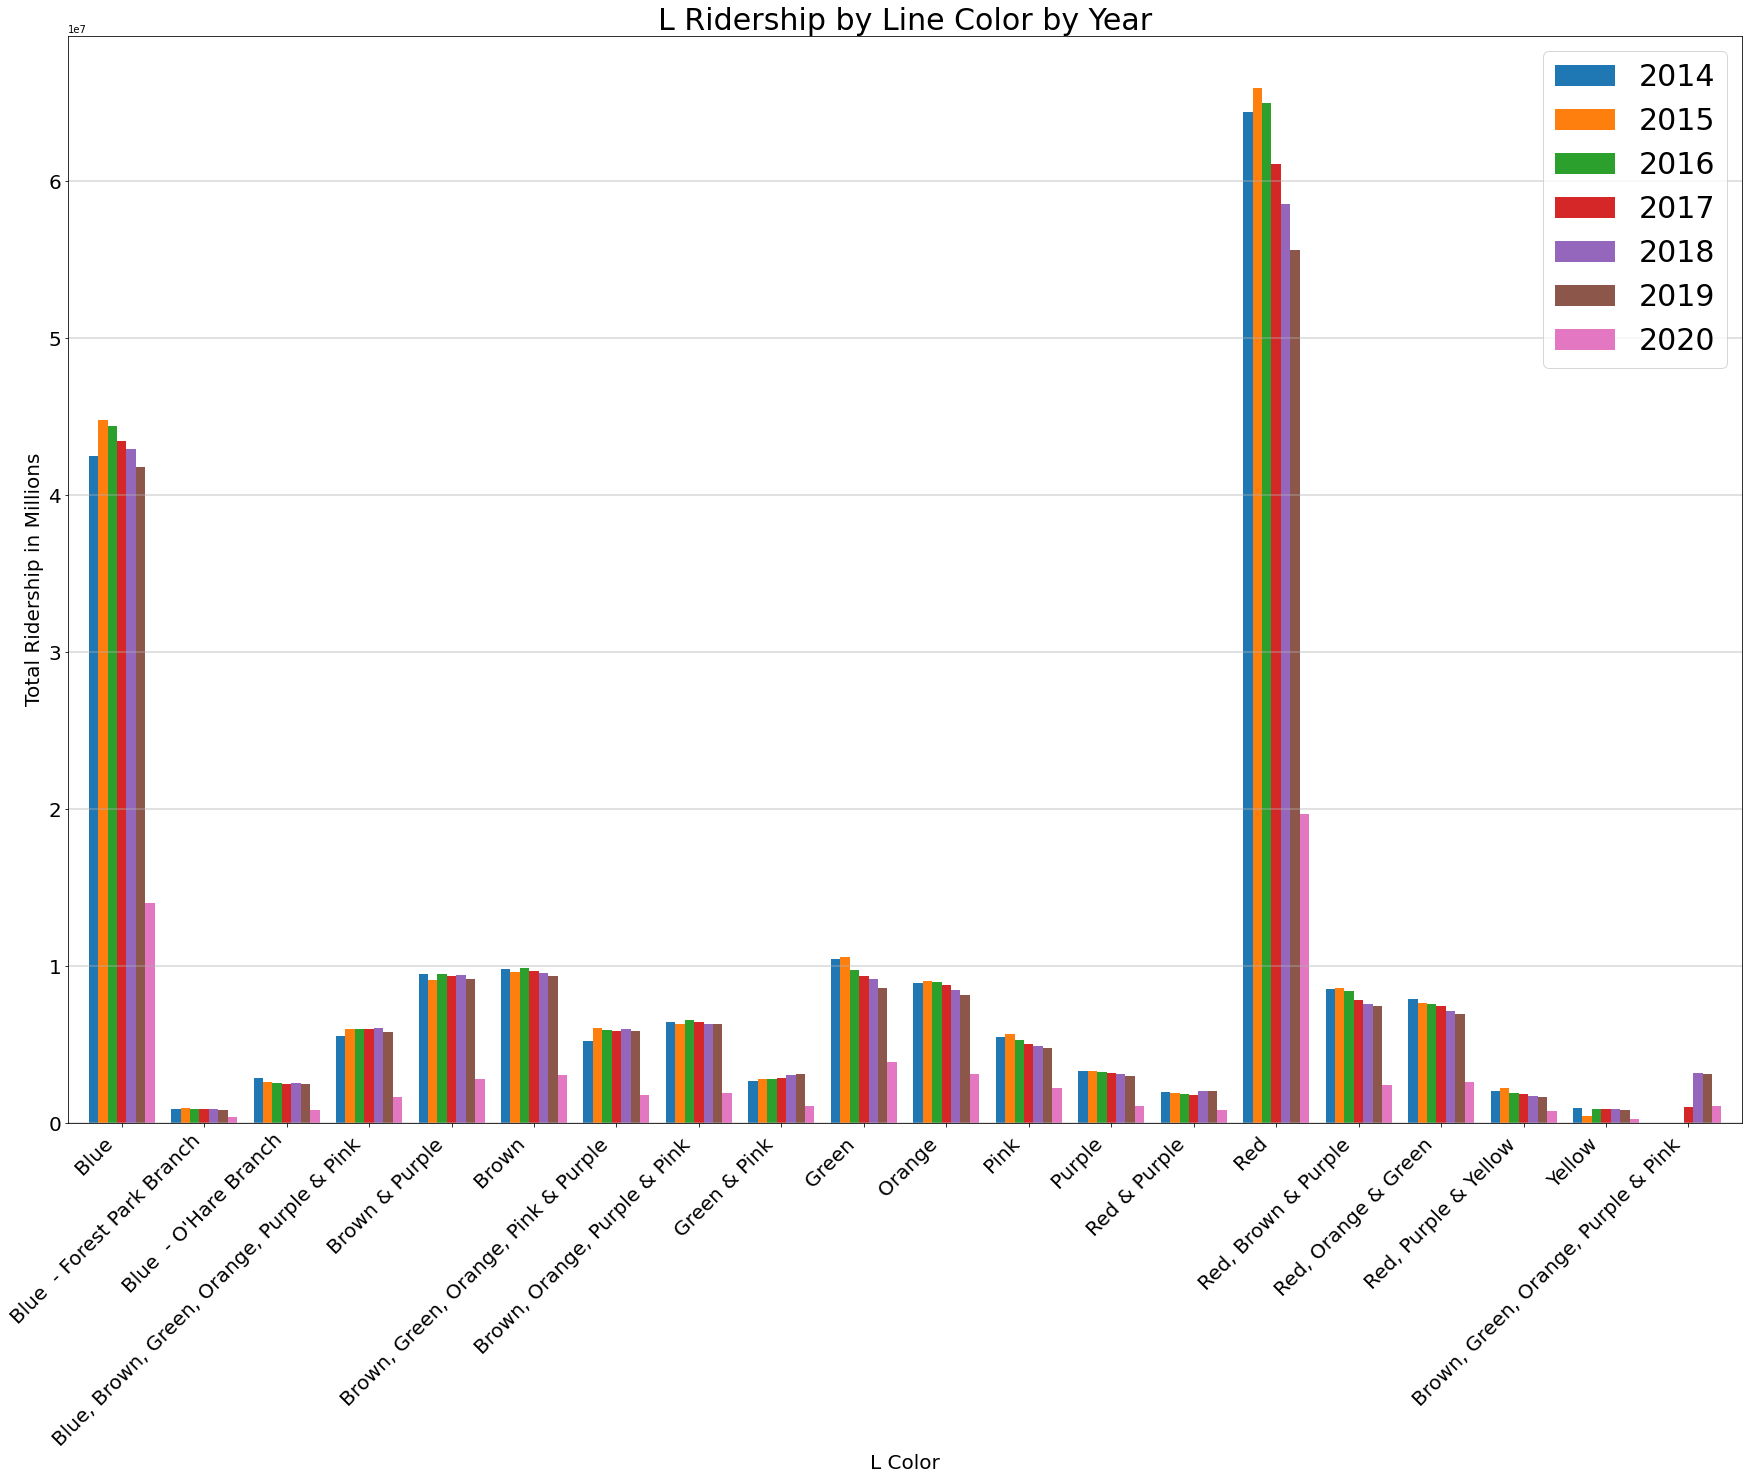

In [33]:
#create plot for monthly totals by L color by year 
df_viz.plot.bar(x='L Color', figsize=(30,20), fontsize=20, width=.8)
plt.xticks(ha='right', rotation=45)
plt.title('L Ridership by Line Color by Year', fontsize=30)
plt.ylabel('Total Ridership in Millions', fontsize=20)
plt.xlabel('L Color', fontsize=20)
plt.legend(fontsize='xx-large', prop={'size': 30})
plt.grid(axis='y', alpha=.5, linewidth=1.5)
plt.savefig('L Ridership by Line Color by Year.png')

In [34]:
#identify highest volume lines in 2014
viz2014

L Color
Blue Line                                          42467521
Blue Line - Forest Park Branch                       924209
Blue Line - O'Hare Branch                           2865335
Blue, Brown, Green, Orange, Purple & Pink Lines     5573235
Brown & Purple Lines                                9486710
Brown Line                                          9815825
Brown, Green, Orange, Pink & Purple Lines           5223647
Brown, Orange, Purple & Pink Lines                  6413202
Green & Pink Lines                                  2668533
Green Line                                         10432459
Orange Line                                         8910756
Pink Line                                           5452165
Purple Line                                         3311197
Red & Purple Lines                                  1974643
Red Line                                           64391171
Red, Brown & Purple Lines                           8552777
Red, Orange & Green Lines       

In [35]:
#identify highest volume lines in 2015
viz2015

L Color
Blue Line                                          44777160
Blue Line - Forest Park Branch                       942126
Blue Line - O'Hare Branch                           2640472
Blue, Brown, Green, Orange, Purple & Pink Lines     5997069
Brown & Purple Lines                                9112653
Brown Line                                          9630048
Brown, Green, Orange, Pink & Purple Lines           6084048
Brown, Orange, Purple & Pink Lines                  6328422
Green & Pink Lines                                  2832378
Green Line                                         10597665
Orange Line                                         9077220
Pink Line                                           5643131
Purple Line                                         3322068
Red & Purple Lines                                  1939936
Red Line                                           65941381
Red, Brown & Purple Lines                           8587086
Red, Orange & Green Lines       

In [36]:
#identify highest volume lines in 2016
viz2016

L Color
Blue Line                                          44420907
Blue Line - Forest Park Branch                       914984
Blue Line - O'Hare Branch                           2533597
Blue, Brown, Green, Orange, Purple & Pink Lines     5972666
Brown & Purple Lines                                9496271
Brown Line                                          9886207
Brown, Green, Orange, Pink & Purple Lines           5955181
Brown, Orange, Purple & Pink Lines                  6545065
Green & Pink Lines                                  2837556
Green Line                                          9722540
Orange Line                                         9016657
Pink Line                                           5267199
Purple Line                                         3275669
Red & Purple Lines                                  1871848
Red Line                                           64965722
Red, Brown & Purple Lines                           8393015
Red, Orange & Green Lines       

In [37]:
#identify highest volume lines in 2017
viz2017

L Color
Blue Line                                          43453621
Blue Line - Forest Park Branch                       889211
Blue Line - O'Hare Branch                           2494196
Blue, Brown, Green, Orange, Purple & Pink Lines     6022533
Brown & Purple Lines                                9368371
Brown Line                                          9709753
Brown, Green, Orange, Pink & Purple Lines           5879773
Brown, Green, Orange, Purple & Pink Lines           1016989
Brown, Orange, Purple & Pink Lines                  6407033
Green & Pink Lines                                  2844470
Green Line                                          9358562
Orange Line                                         8774837
Pink Line                                           5044294
Purple Line                                         3185926
Red & Purple Lines                                  1788035
Red Line                                           61094912
Red, Brown & Purple Lines       

In [38]:
#identify highest volume lines in 2018
viz2018

L Color
Blue Line                                          42917824
Blue Line - Forest Park Branch                       873289
Blue Line - O'Hare Branch                           2526333
Blue, Brown, Green, Orange, Purple & Pink Lines     6048315
Brown & Purple Lines                                9443693
Brown Line                                          9533495
Brown, Green, Orange, Pink & Purple Lines           6004805
Brown, Green, Orange, Purple & Pink Lines           3178881
Brown, Orange, Purple & Pink Lines                  6284219
Green & Pink Lines                                  3038317
Green Line                                          9185680
Orange Line                                         8462263
Pink Line                                           4938107
Purple Line                                         3126507
Red & Purple Lines                                  2061761
Red Line                                           58526858
Red, Brown & Purple Lines       

In [39]:
#identify highest volume lines in 2019
viz2019

L Color
Blue Line                                          41777714
Blue Line - Forest Park Branch                       838646
Blue Line - O'Hare Branch                           2494304
Blue, Brown, Green, Orange, Purple & Pink Lines     5830767
Brown & Purple Lines                                9185230
Brown Line                                          9340841
Brown, Green, Orange, Pink & Purple Lines           5870670
Brown, Green, Orange, Purple & Pink Lines           3126070
Brown, Orange, Purple & Pink Lines                  6309948
Green & Pink Lines                                  3122020
Green Line                                          8629857
Orange Line                                         8182401
Pink Line                                           4801625
Purple Line                                         3010072
Red & Purple Lines                                  2043387
Red Line                                           55614220
Red, Brown & Purple Lines       

In [40]:
#identify highest volume lines in 2020
viz2020

L Color
Blue Line                                          14044781
Blue Line - Forest Park Branch                       357808
Blue Line - O'Hare Branch                            822720
Blue, Brown, Green, Orange, Purple & Pink Lines     1648674
Brown & Purple Lines                                2802577
Brown Line                                          3094301
Brown, Green, Orange, Pink & Purple Lines           1800717
Brown, Green, Orange, Purple & Pink Lines           1082287
Brown, Orange, Purple & Pink Lines                  1898658
Green & Pink Lines                                  1089998
Green Line                                          3896534
Orange Line                                         3153749
Pink Line                                           2207473
Purple Line                                         1063947
Red & Purple Lines                                   857136
Red Line                                           19691201
Red, Brown & Purple Lines       

In [41]:
#print finding of highest two independent lines 
print('Between 2014 and 2020, the Blue and Red lines remaining the two highest volume independent lines.')

Between 2014 and 2020, the Blue and Red lines remaining the two highest volume independent lines.


In [42]:
#look at blue adn red independent lines only 
blue_and_red_df = cleaned_monthly_df[((new_monthly_df['L Color'] == 'Red Line') | (new_monthly_df['L Color'] == 'Blue Line'))]
blue_and_red_df.head()

,Year,Month,L Color,Station Name,Monthly Total,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides
344,2014,1,Red Line,Jarvis,43795,1509.8,1363.0,1025.6
346,2014,2,Red Line,Jarvis,43025,1649.2,1429.8,1080.8
348,2014,3,Red Line,Jarvis,47452,1675.1,1419.4,1035.4
350,2014,4,Red Line,Jarvis,46612,1659.0,1471.3,1057.0
352,2014,5,Red Line,Jarvis,48888,1702.7,1496.6,1129.6


In [43]:
#remove uneeded columns 
blue_and_red_clean_df = blue_and_red_df.drop(['Average Weekday Rides','Average Saturday Rides','Average Sunday-Holiday Rides'], axis=1)
blue_and_red_clean_df.head()

,Year,Month,L Color,Station Name,Monthly Total
344,2014,1,Red Line,Jarvis,43795
346,2014,2,Red Line,Jarvis,43025
348,2014,3,Red Line,Jarvis,47452
350,2014,4,Red Line,Jarvis,46612
352,2014,5,Red Line,Jarvis,48888


In [44]:
# look at red and blue lines by year and check output 
blue_and_red_clean_df_2014 = blue_and_red_clean_df[blue_and_red_clean_df.Year==2014].copy()
blue_and_red_clean_df_2015 = blue_and_red_clean_df[blue_and_red_clean_df.Year==2015].copy()
blue_and_red_clean_df_2016 = blue_and_red_clean_df[blue_and_red_clean_df.Year==2016].copy()
blue_and_red_clean_df_2017 = blue_and_red_clean_df[blue_and_red_clean_df.Year==2017].copy()
blue_and_red_clean_df_2018 = blue_and_red_clean_df[blue_and_red_clean_df.Year==2018].copy()
blue_and_red_clean_df_2019 = blue_and_red_clean_df[blue_and_red_clean_df.Year==2019].copy()
blue_and_red_clean_df_2020 = blue_and_red_clean_df[blue_and_red_clean_df.Year==2020].copy()
blue_and_red_clean_df_2014.head()

,Year,Month,L Color,Station Name,Monthly Total
344,2014,1,Red Line,Jarvis,43795
346,2014,2,Red Line,Jarvis,43025
348,2014,3,Red Line,Jarvis,47452
350,2014,4,Red Line,Jarvis,46612
352,2014,5,Red Line,Jarvis,48888


In [45]:
# group red and blue lines by year by station and check output
blue_and_red_station_grouped2014 = blue_and_red_clean_df_2014.groupby('Station Name')
blue_and_red_station_grouped2015 = blue_and_red_clean_df_2015.groupby('Station Name')
blue_and_red_station_grouped2016 = blue_and_red_clean_df_2016.groupby('Station Name')
blue_and_red_station_grouped2017 = blue_and_red_clean_df_2017.groupby('Station Name')
blue_and_red_station_grouped2018 = blue_and_red_clean_df_2018.groupby('Station Name')
blue_and_red_station_grouped2019 = blue_and_red_clean_df_2019.groupby('Station Name')
blue_and_red_station_grouped2020 = blue_and_red_clean_df_2020.groupby('Station Name')
blue_and_red_station_grouped2014.head()

,Year,Month,L Color,Station Name,Monthly Total
344,2014,1,Red Line,Jarvis,43795
346,2014,2,Red Line,Jarvis,43025
348,2014,3,Red Line,Jarvis,47452
350,2014,4,Red Line,Jarvis,46612
352,2014,5,Red Line,Jarvis,48888
...,...,...,...,...,...
13764,2014,1,Blue Line,Forest Park,82079
13766,2014,2,Blue Line,Forest Park,83685
13768,2014,3,Blue Line,Forest Park,94142
13770,2014,4,Blue Line,Forest Park,98806


In [46]:
# find monthly totals of usage for each station for Red and Blue independent lines by year 
blue_and_red_station_sum2014 = blue_and_red_station_grouped2014.sum(['Monthly Total'])
blue_and_red_station_sum2015 = blue_and_red_station_grouped2015.sum(['Monthly Total'])
blue_and_red_station_sum2016 = blue_and_red_station_grouped2016.sum(['Monthly Total'])
blue_and_red_station_sum2017 = blue_and_red_station_grouped2017.sum(['Monthly Total'])
blue_and_red_station_sum2018 = blue_and_red_station_grouped2018.sum(['Monthly Total'])
blue_and_red_station_sum2019 = blue_and_red_station_grouped2019.sum(['Monthly Total'])
blue_and_red_station_sum2020 = blue_and_red_station_grouped2020.sum(['Monthly Total'])
blue_and_red_station_sum2014.head()

,Year,Month,Monthly Total
Station Name,,,
47th-Dan Ryan,24168,78,1038641
63rd-Dan Ryan,24168,78,1127593
69th,24168,78,1800001
79th,24168,78,2418676
87th,24168,78,1506362


In [47]:
#visualize monthly totals at each station for Blue and Red independent lines by month by year and check ouput
blue_and_red_station_viz2014 = blue_and_red_station_sum2014['Monthly Total']
blue_and_red_station_viz2015 = blue_and_red_station_sum2015['Monthly Total']
blue_and_red_station_viz2016 = blue_and_red_station_sum2016['Monthly Total']
blue_and_red_station_viz2017 = blue_and_red_station_sum2017['Monthly Total']
blue_and_red_station_viz2018 = blue_and_red_station_sum2018['Monthly Total']
blue_and_red_station_viz2019 = blue_and_red_station_sum2019['Monthly Total']
blue_and_red_station_viz2020 = blue_and_red_station_sum2020['Monthly Total']
blue_and_red_station_viz2014.head()

Station Name
47th-Dan Ryan    1038641
63rd-Dan Ryan    1127593
69th             1800001
79th             2418676
87th             1506362
Name: Monthly Total, dtype: int64

In [48]:
#combine monthly totals for each station for Blue and Red independent lines by year and check output 
blue_and_red_station_df_viz = pd.concat([blue_and_red_station_viz2014, blue_and_red_station_viz2015, blue_and_red_station_viz2016, blue_and_red_station_viz2017, blue_and_red_station_viz2018, blue_and_red_station_viz2019, blue_and_red_station_viz2020],axis=1)
blue_and_red_station_df_viz.columns = ['2014','2015', '2016', '2017', '2018', '2019', '2020']
blue_and_red_station_df_viz.head()

,2014,2015,2016,2017,2018,2019,2020
Station Name,,,,,,,
47th-Dan Ryan,1038641,1092041,1045205,909500,931630,869861,403043
63rd-Dan Ryan,1127593,1035030,1047620,979354,974550,937730,452870
69th,1800001,1870456,1780101,1665318,1564203,1423925,682175
79th,2418676,2507871,2363196,2213115,2120951,1975866,972675
87th,1506362,1516456,1408573,1320551,1286860,1186724,551680


In [49]:
#list all station names 
blue_and_red_station_df_viz.index

Index(['47th-Dan Ryan', '63rd-Dan Ryan', '69th', '79th', '87th',
       '95th/Dan Ryan', 'Addison-North Main', 'Addison-O'Hare', 'Argyle',
       'Austin-Forest Park', 'Belmont-O'Hare', 'Berwyn', 'Bryn Mawr',
       'California/Milwaukee', 'Cermak-Chinatown', 'Chicago/Milwaukee',
       'Chicago/State', 'Cicero-Forest Park', 'Clark/Division',
       'Clinton-Forest Park', 'Cumberland', 'Damen/Milwaukee',
       'Division/Milwaukee', 'Forest Park', 'Garfield-Dan Ryan',
       'Grand/Milwaukee', 'Grand/State', 'Granville', 'Harrison',
       'Irving Park-O'Hare', 'Jackson/Dearborn', 'Jackson/State', 'Jarvis',
       'Jefferson Park', 'Kedzie-Homan-Forest Park', 'LaSalle', 'Lake/State',
       'Lawrence', 'Logan Square', 'Loyola', 'Medical Center',
       'Monroe/Dearborn', 'Monroe/State', 'Montrose-O'Hare', 'Morse',
       'North/Clybourn', 'O'Hare Airport', 'Oak Park-Forest Park',
       'Pulaski-Forest Park', 'Racine', 'Rosemont', 'Sheridan',
       'Sox-35th-Dan Ryan', 'Thorndale', 'U

In [50]:
#reset index to put station name as column and check output 
blue_and_red_station_df_viz.reset_index(inplace=True)
blue_and_red_station_df_viz.head()

,Station Name,2014,2015,2016,2017,2018,2019,2020
0,47th-Dan Ryan,1038641,1092041,1045205,909500,931630,869861,403043
1,63rd-Dan Ryan,1127593,1035030,1047620,979354,974550,937730,452870
2,69th,1800001,1870456,1780101,1665318,1564203,1423925,682175
3,79th,2418676,2507871,2363196,2213115,2120951,1975866,972675
4,87th,1506362,1516456,1408573,1320551,1286860,1186724,551680


In [51]:
#reset column name to Station and check output 
blue_and_red_station_df_viz.rename(columns={"index": "Station"}, inplace=True)
blue_and_red_station_df_viz.head()

,Station Name,2014,2015,2016,2017,2018,2019,2020
0,47th-Dan Ryan,1038641,1092041,1045205,909500,931630,869861,403043
1,63rd-Dan Ryan,1127593,1035030,1047620,979354,974550,937730,452870
2,69th,1800001,1870456,1780101,1665318,1564203,1423925,682175
3,79th,2418676,2507871,2363196,2213115,2120951,1975866,972675
4,87th,1506362,1516456,1408573,1320551,1286860,1186724,551680


In [52]:
#look at values to see range of L use across stations
blue_and_red_station_df_viz.describe()

,2014,2015,2016,2017,2018,2019,2020
count,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01
mean,1.908191e+06,1.977117e+06,1.953333e+06,1.866938e+06,1.811512e+06,1.739142e+06,6.024282e+05
std,1.370562e+06,1.434897e+06,1.419719e+06,1.356164e+06,1.312324e+06,1.270122e+06,4.530147e+05
min,4.806850e+05,4.829400e+05,4.787180e+05,4.421130e+05,4.155540e+05,4.085390e+05,1.515890e+05
25%,1.074006e+06,1.067722e+06,1.047016e+06,9.889450e+05,9.743282e+05,9.286062e+05,3.506060e+05
50%,1.584935e+06,1.576828e+06,1.562356e+06,1.509610e+06,1.449272e+06,1.389042e+06,4.852365e+05
75%,2.173428e+06,2.259403e+06,2.305730e+06,2.172963e+06,2.098229e+06,2.025195e+06,6.866918e+05
max,7.339198e+06,7.352430e+06,7.013905e+06,6.650401e+06,6.604902e+06,6.450839e+06,2.850190e+06


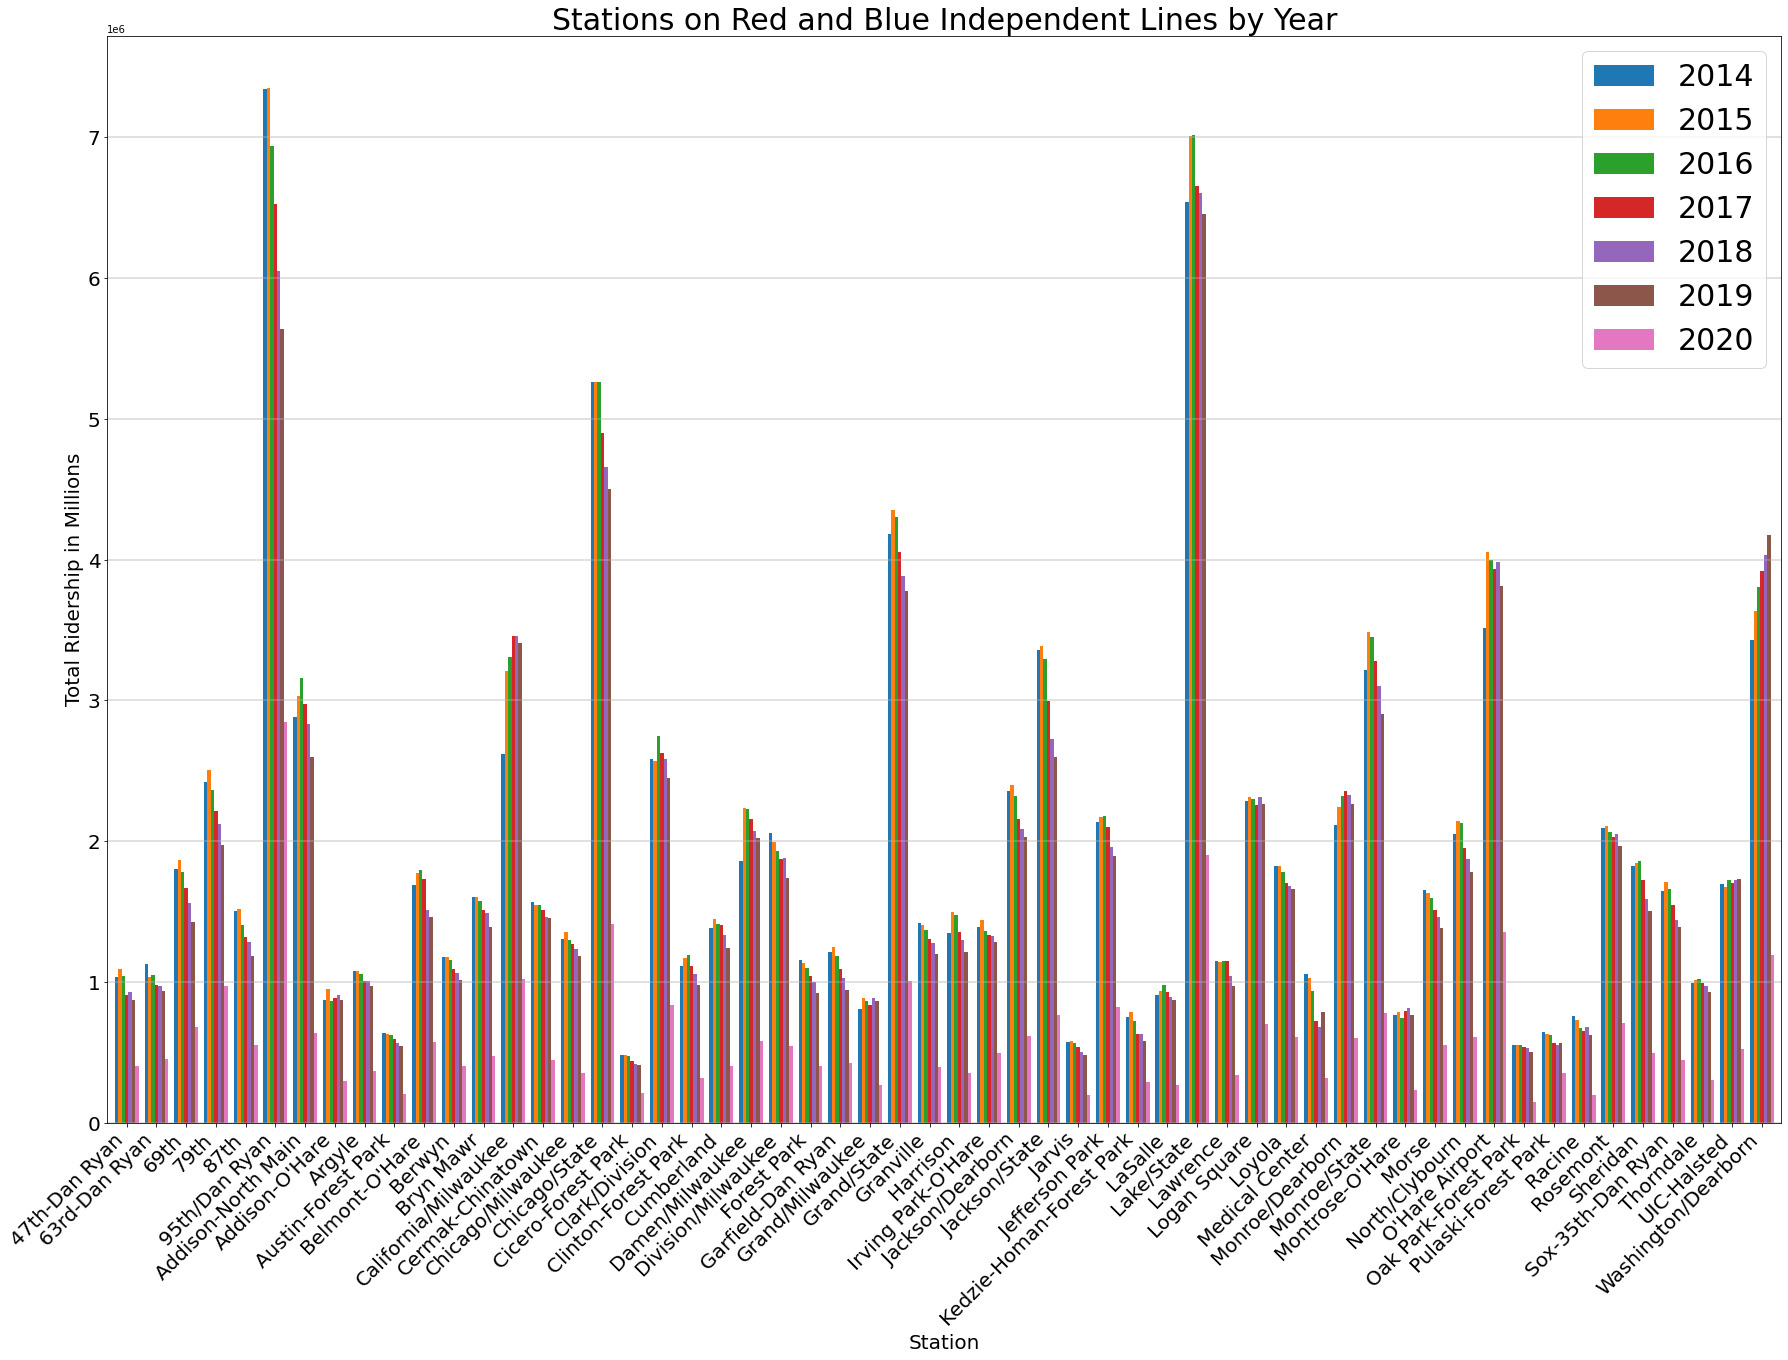

In [55]:
#plot blue and red independent lines by monthly use by year 
blue_and_red_station_df_viz.plot.bar(x='Station Name', figsize=(30,20), fontsize=20, width=.8)
plt.xticks(ha='right', rotation=45)
plt.title('Stations on Red and Blue Independent Lines by Year', fontsize=30)
plt.ylabel('Total Ridership in Millions', fontsize=20)
plt.xlabel('Station', fontsize=20)
plt.legend(fontsize='xx-large', prop={'size': 30})
plt.grid(axis='y', alpha=.5, linewidth=1.5)
plt.savefig('Red and Blue Independent Line Ridership by Station by Year.png')

In [56]:
#limit to top 5 busiest stations 
busiest_stations = ['95th/Dan Ryan', 'Chicago/State', 'Grand/State', 'Lake/State', 'Washington/Dearborn']

In [57]:
#restrict df to include only top 5 busiest stations  
busiest_blue_and_red_station_df_viz = blue_and_red_station_df_viz[blue_and_red_station_df_viz['Station Name'].isin(busiest_stations)]


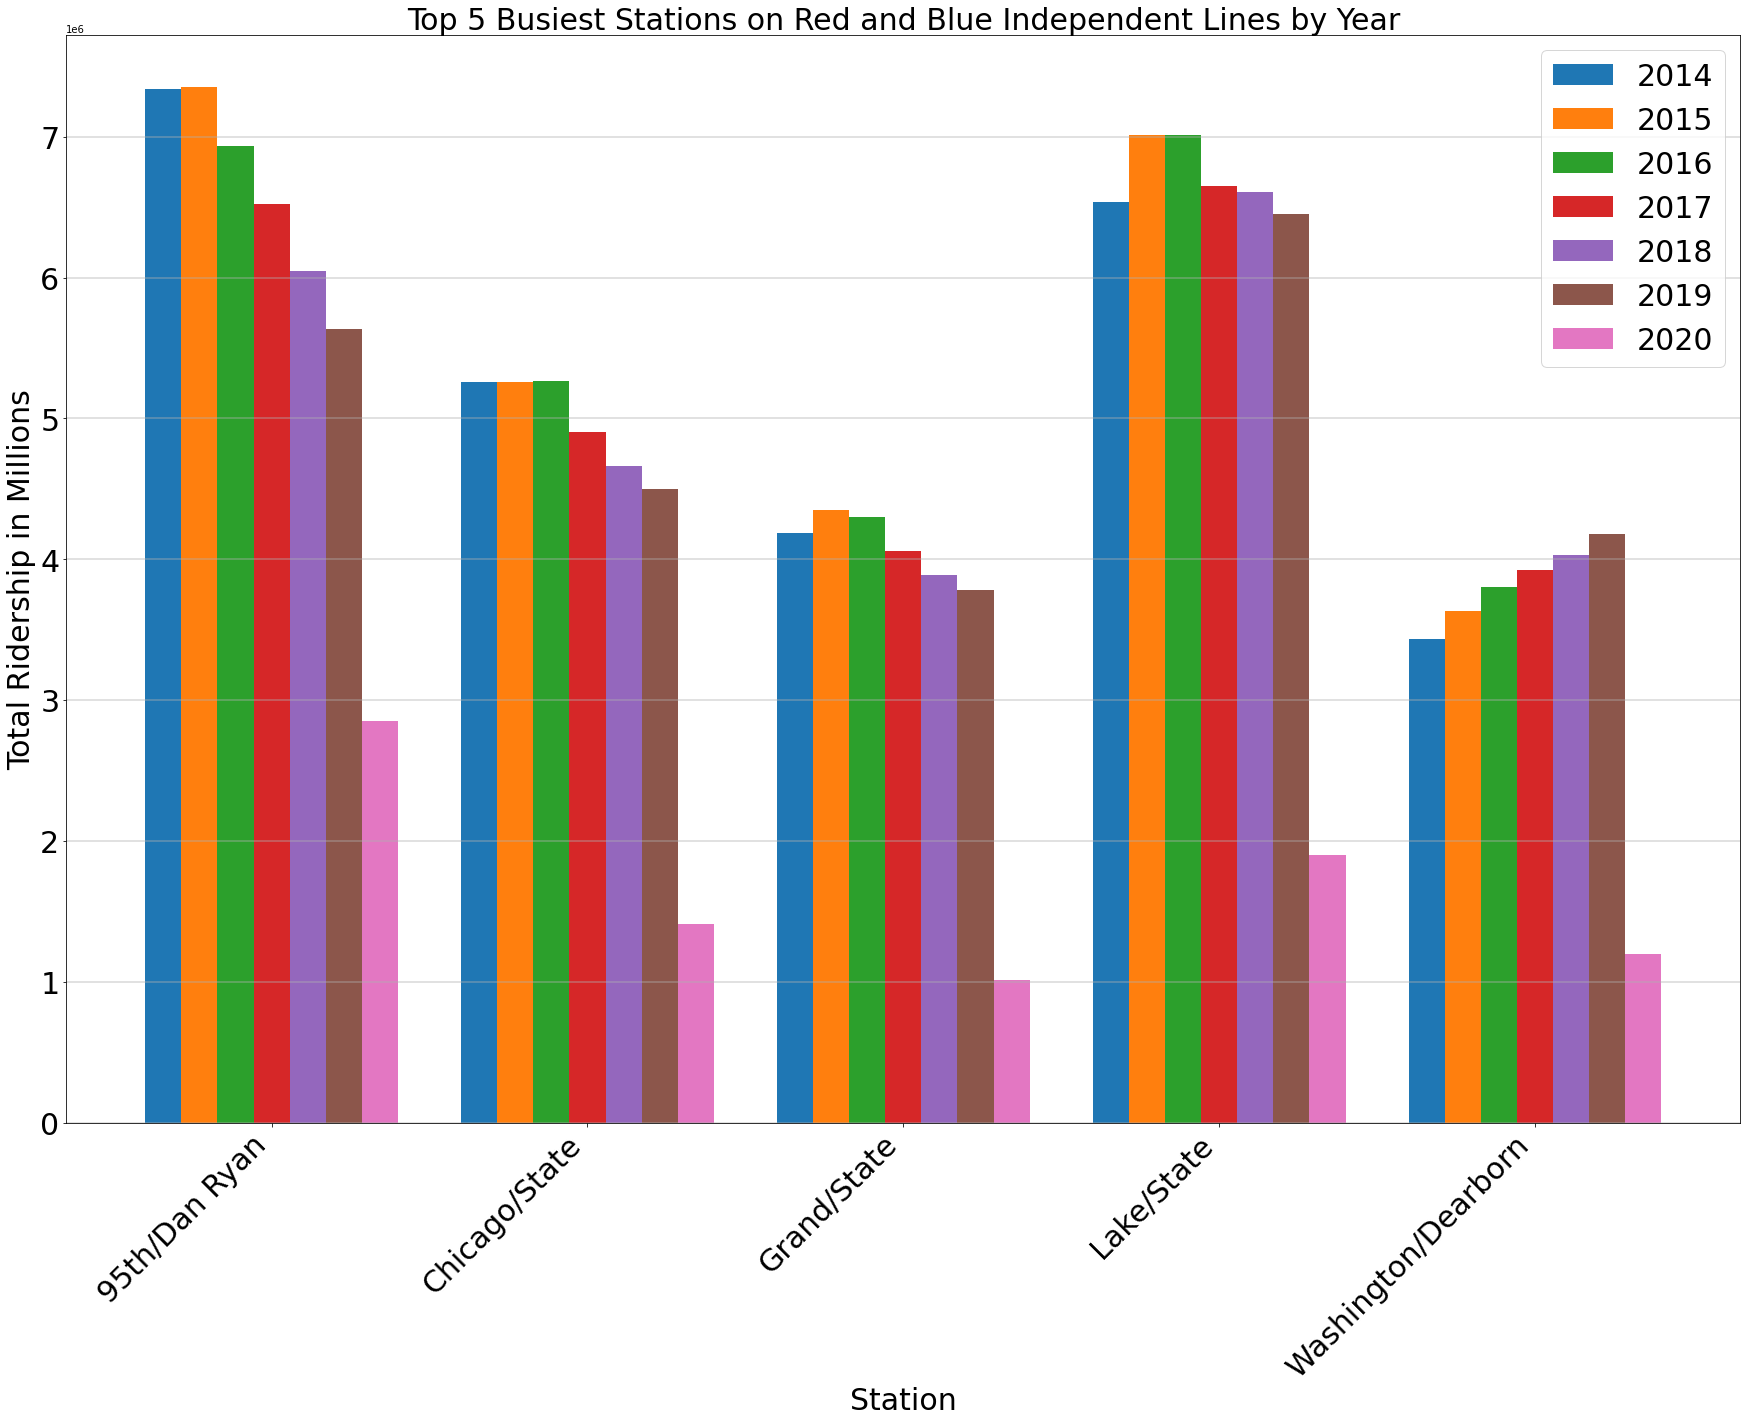

In [59]:
#plot top 5 busiest stations on blue and red independent lines by monthly use by year 
busiest_blue_and_red_station_df_viz.plot.bar(x='Station Name', figsize=(30,20), fontsize=30, width=.8)
plt.xticks(ha='right', rotation=45)
plt.title('Top 5 Busiest Stations on Red and Blue Independent Lines by Year', fontsize=30)
plt.ylabel('Total Ridership in Millions', fontsize=30)
plt.xlabel('Station', fontsize=30)
plt.legend(fontsize='xx-large', prop={'size': 30})
plt.grid(axis='y', alpha=.5, linewidth=1.5)
plt.savefig('Top 5 Busiest Stations on Red and Blue Independent Lines by Year.png')